In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2


In [2]:
df = pd.read_excel("C:/Users/srira/Downloads/Diabetes prediction_dataset (1).xlsx")



In [3]:
print(df.head())


   Gender   Age  Hypertension  Heart_disease Smoking_history    BMI  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  Blood_glucose_level  Diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               100000 non-null  object 
 1   Age                  100000 non-null  float64
 2   Hypertension         100000 non-null  int64  
 3   Heart_disease        100000 non-null  int64  
 4   Smoking_history      100000 non-null  object 
 5   BMI                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   Blood_glucose_level  100000 non-null  int64  
 8   Diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [5]:
print(df.describe())

                 Age  Hypertension  Heart_disease            BMI  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  Blood_glucose_level       Diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [6]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

Gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
Smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [7]:
print(df.isnull().sum())

Gender                 0
Age                    0
Hypertension           0
Heart_disease          0
Smoking_history        0
BMI                    0
HbA1c_level            0
Blood_glucose_level    0
Diabetes               0
dtype: int64


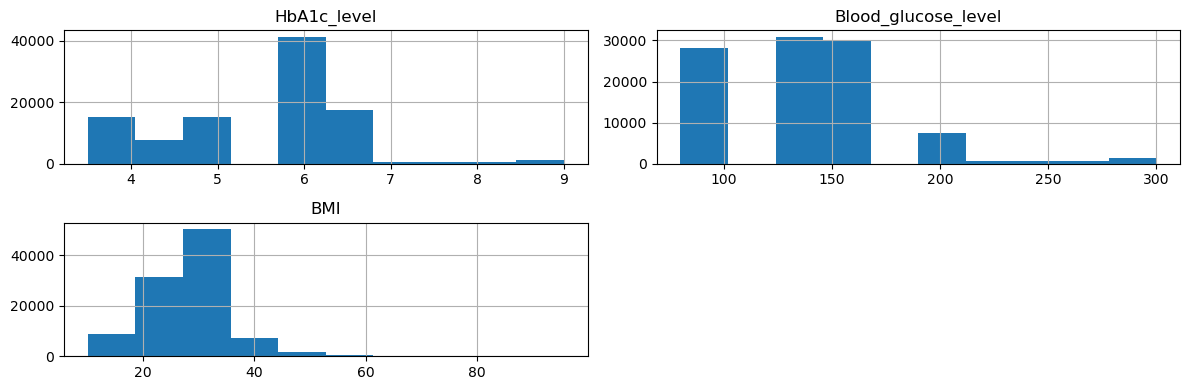

In [8]:
# Univariate Analysis
# Histograms for 'HbA1c_level', 'Blood_glucose_level', and 'BMI'
df[['HbA1c_level', 'Blood_glucose_level', 'BMI']].hist(figsize=(12, 4))
plt.tight_layout()
plt.show()

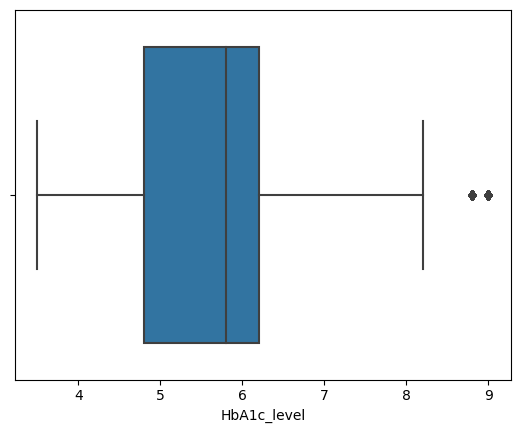

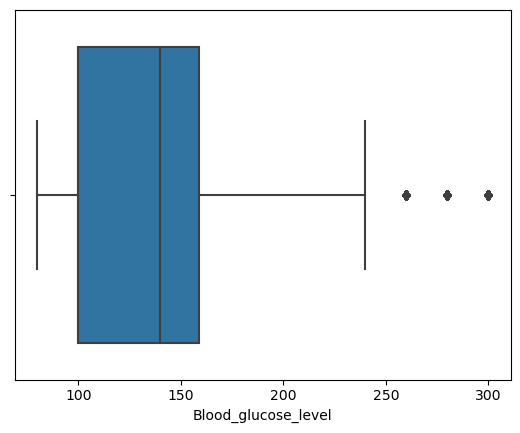

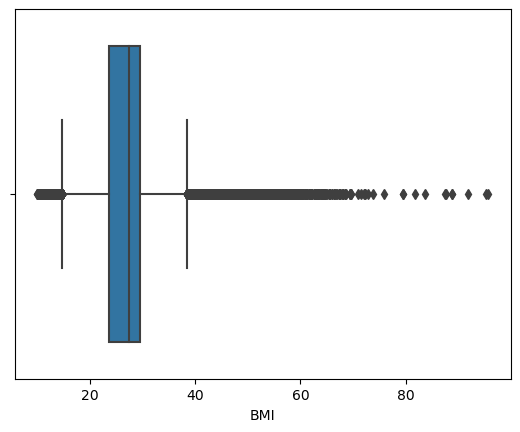

In [9]:
# Boxplots for the same to check for outliers
for column in ['HbA1c_level', 'Blood_glucose_level', 'BMI']:
    sns.boxplot(x=df[column])
    plt.show()


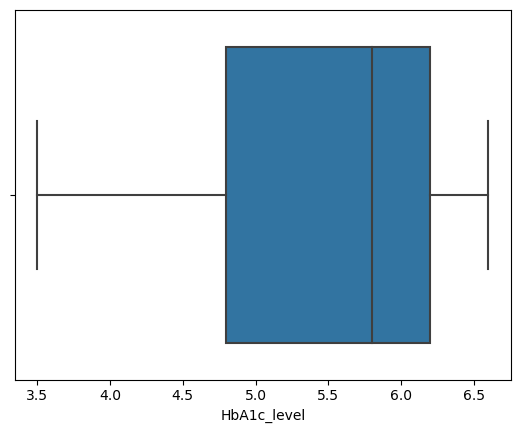

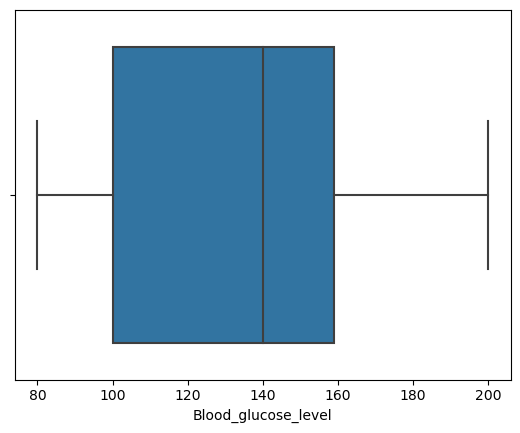

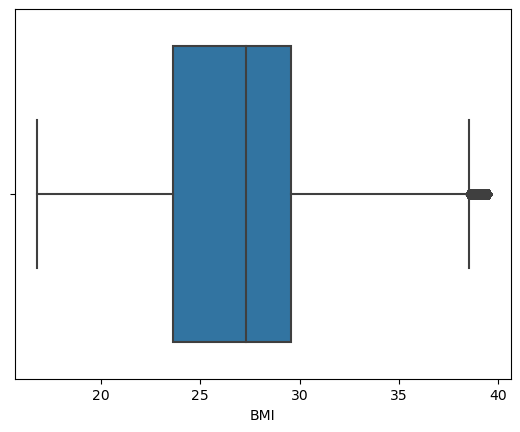

In [10]:
from scipy.stats.mstats import winsorize

# Define the columns you want to winsorize
columns_to_winsorize = ['HbA1c_level', 'Blood_glucose_level', 'BMI']

# Apply winsorization to each column
for column in columns_to_winsorize:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])  # 5% from both ends

# If you want to apply winsorization only to the upper end (which is common for skewed data):
# for column in columns_to_winsorize:
#     df[column] = winsorize(df[column], limits=[0, 0.10])  # 10% from the upper end only

# Now you can review the boxplots again to see the effect of winsorization
for column in columns_to_winsorize:
    sns.boxplot(x=df[column])
    plt.show()


C:\Users\srira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


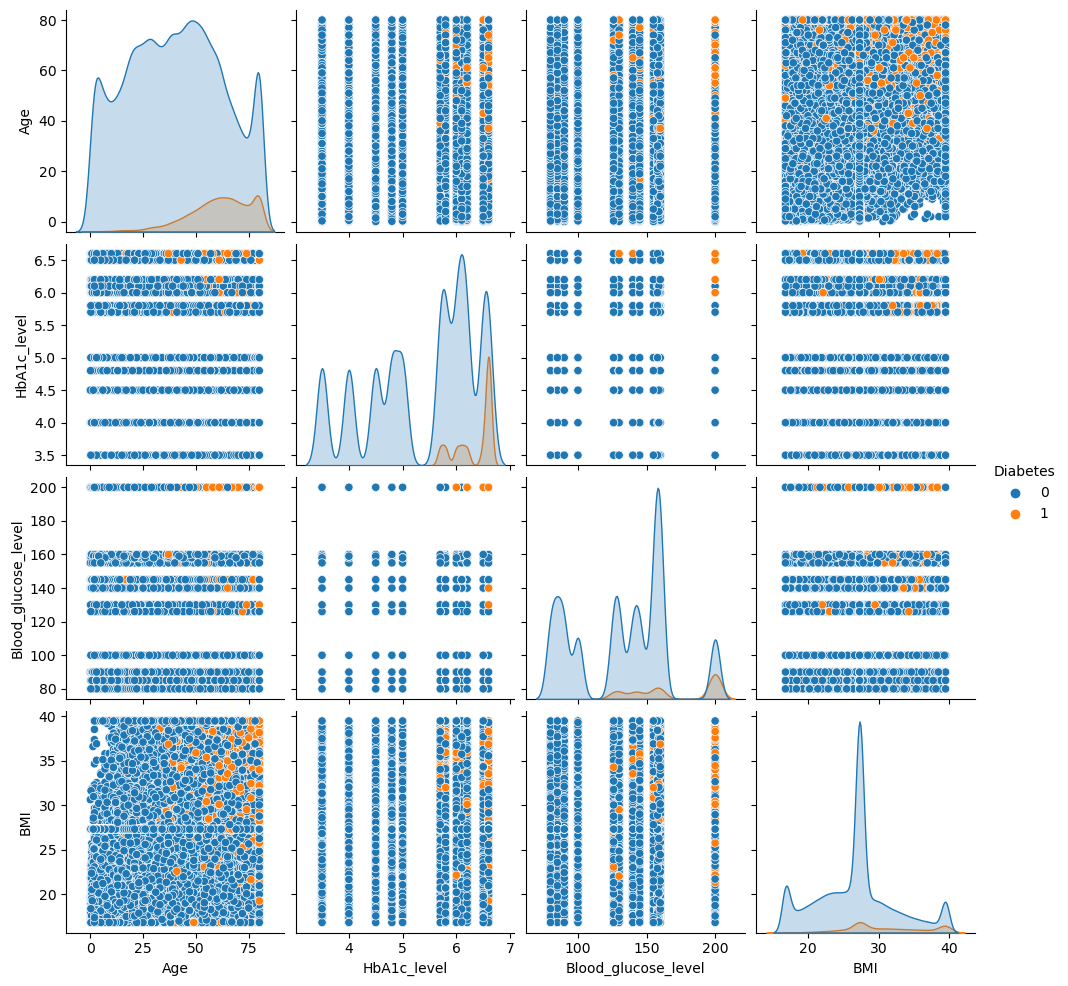

In [11]:
# Bivariate Analysis
# Scatter plots for numerical features vs 'Diabetes'
sns.pairplot(df, hue='Diabetes', vars=['Age', 'HbA1c_level', 'Blood_glucose_level', 'BMI'])
plt.show()

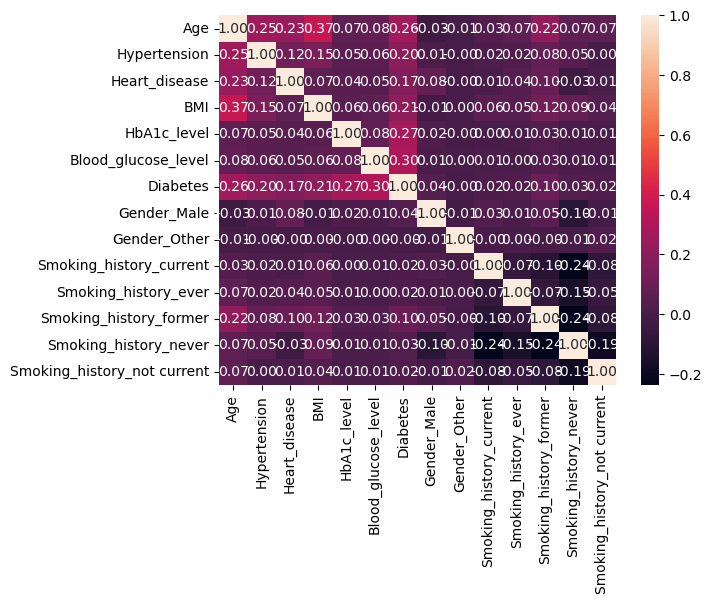

In [12]:
# Assuming 'df' is your original DataFrame and you want to include 'Gender' and 'Smoking_history' in the correlation matrix

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

# Now 'df_encoded' has all numeric columns, including the encoded categorical variables.
# You can now compute the correlation matrix on this all-numeric DataFrame.
corr_matrix = df_encoded.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_excel('/content/Diabetes prediction_dataset (1).xlsx')

# Identify categorical and numerical columns
categorical_features = ['Gender', 'Smoking_history']
numerical_features = ['Age', 'Hypertension', 'Heart_disease', 'BMI', 'HbA1c_level', 'Blood_glucose_level']

# Preprocessing for numerical data: imputation + scaling + polynomial features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

# Preprocessing for categorical data: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Feature selection is part of the pipeline
feature_selection = SelectKBest(mutual_info_classif, k=10)

# Define the model pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('feature_selection', feature_selection),
                              ('model', RandomForestClassifier(n_estimators=100, random_state=42))])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('feature_selection', feature_selection),
                              ('model', LogisticRegression(max_iter=1000, random_state=42))])

# Split data into train and test sets
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and evaluate RandomForest Classifier
rf_pipeline.fit(X_train, y_train)
print("Random Forest Model Score: ", rf_pipeline.score(X_test, y_test))

# Fit and evaluate Logistic Regression
lr_pipeline.fit(X_train, y_train)
print("Logistic Regression Model Score: ", lr_pipeline.score(X_test, y_test))


FileNotFoundError: [Errno 2] No such file or directory: '/content/Diabetes prediction_dataset (1).xlsx'